## Exercícios de Física Computacional

### ano lectivo 2021/22

### folha de exercícios 5 - exercícios resolvidos - PL 30/11/2021

_Nuno Castro_

Universidade do Minho

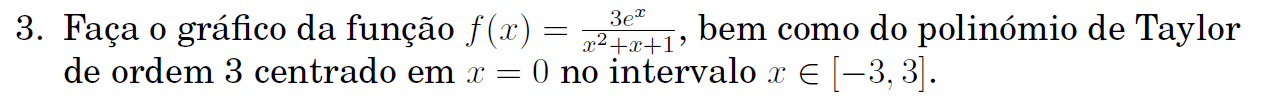

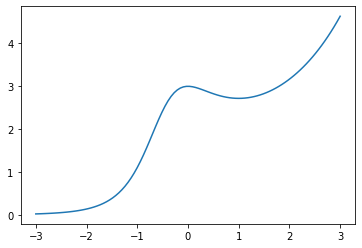

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,100)
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)
y = f(x)
plt.plot(x,y);
plt.show()

In [9]:
from scipy.misc import derivative

a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=2) / 2
a3 = derivative(f,0,dx=0.001,n=3, order = 5) / 6
# The parameter order specifies the number of points to use
# The value order must be odd and at least n + 1

print(a0,a1,a2,a3)

3.0 1.9999983891239026e-06 -1.50000037502096 1.9999920978600965


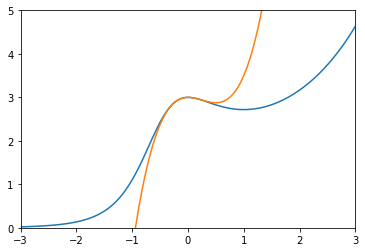

In [19]:
T3 = a0 + a1*x + a2*x**2 + a3*x**3
plt.plot(x,y,x,T3), plt.xlim([-3,3]), plt.ylim([0,5]);
plt.show()

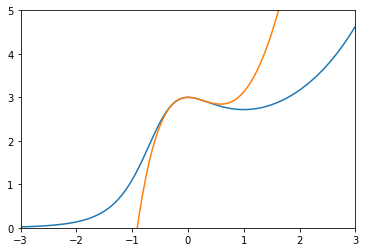

In [20]:
from math import factorial
a4 = derivative(f,0,dx=0.001,n=4,order=7) / factorial(4)

T4 = T3 + a4*x**4
plt.plot(x,y,x,T4), plt.xlim([-3,3]), plt.ylim([0,5]);
plt.show()

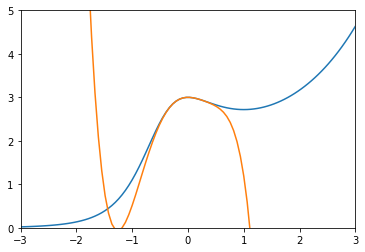

In [21]:
a5 = derivative(f,0,dx=0.001,n=5,order=7) / factorial(5)
a6 = derivative(f,0,dx=0.001,n=5,order=9) / factorial(6)
a7 = derivative(f,0,dx=0.001,n=5,order=9) / factorial(7)

T7 = T4 + a5*x**5 + a6*x**6 + a7*x**7
plt.plot(x,y,x,T7), plt.xlim([-3,3]), plt.ylim([0,5]);
plt.show()

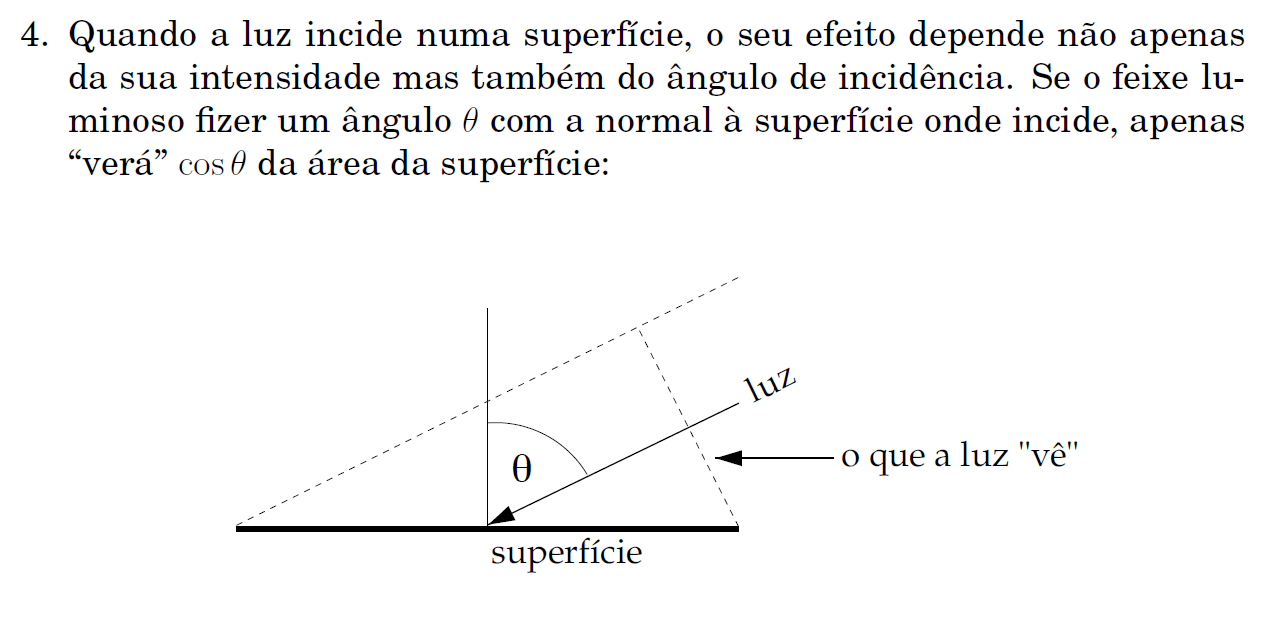

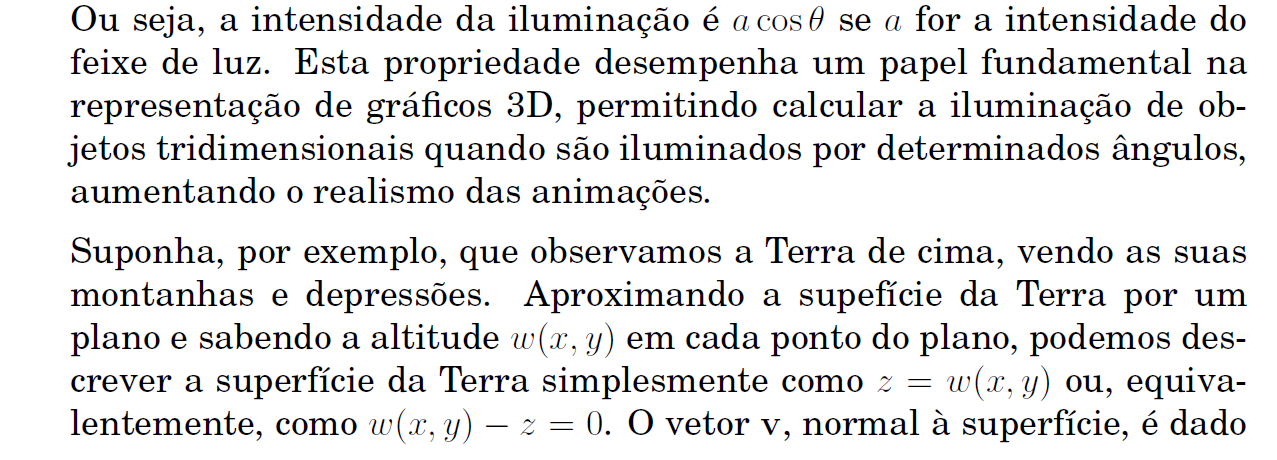

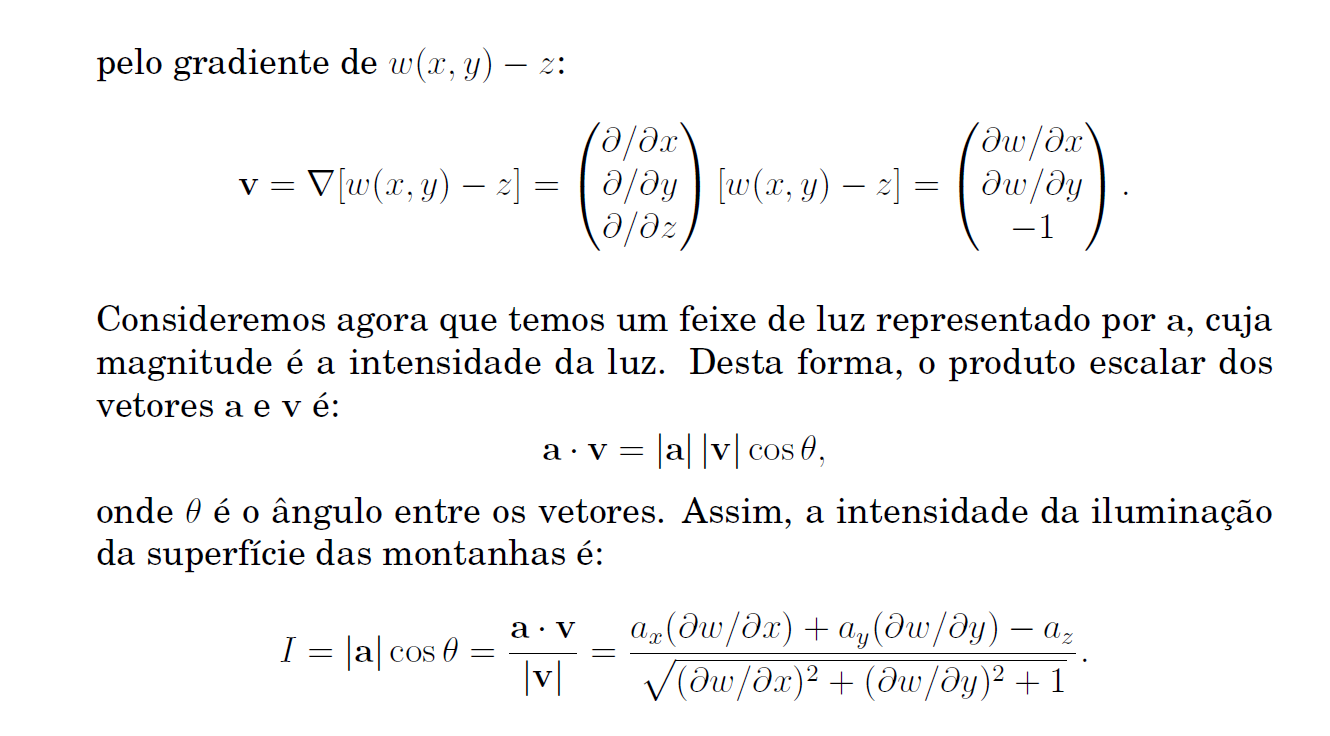

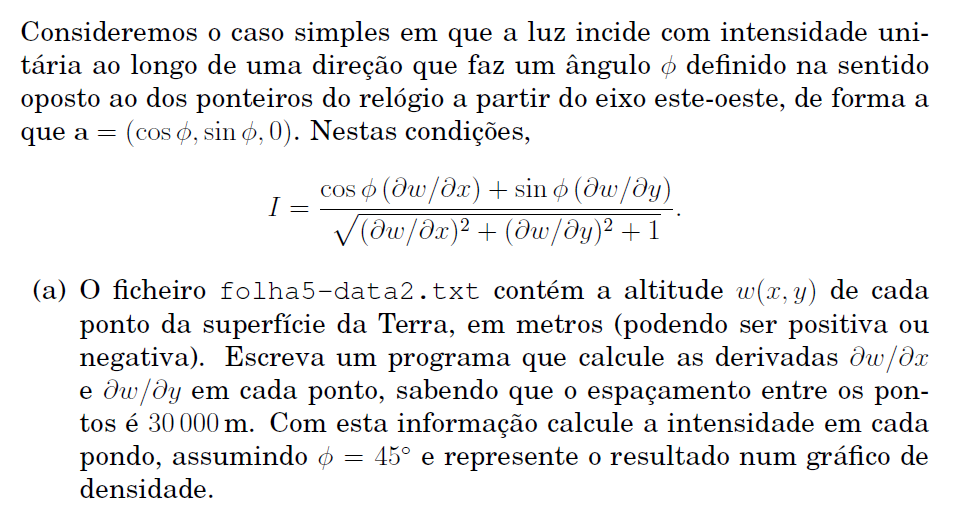

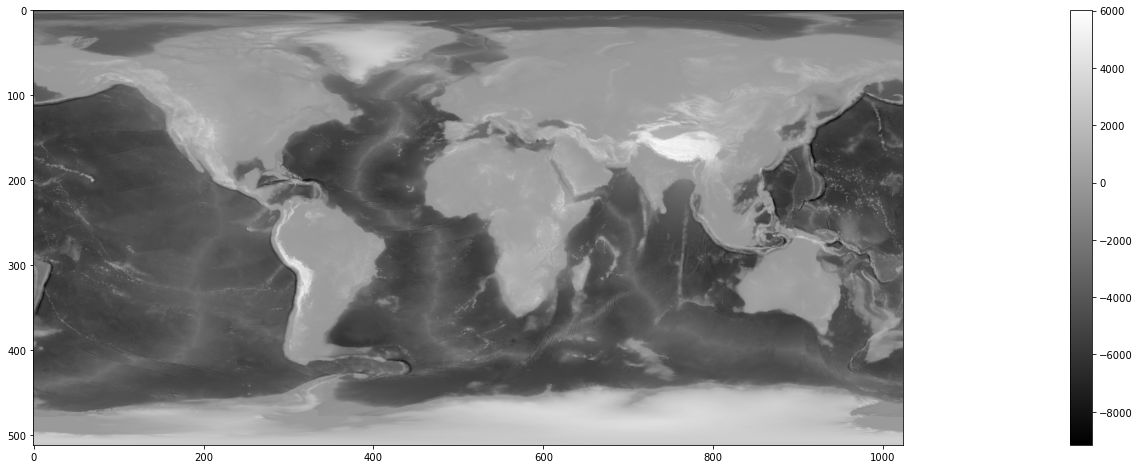

512 1024


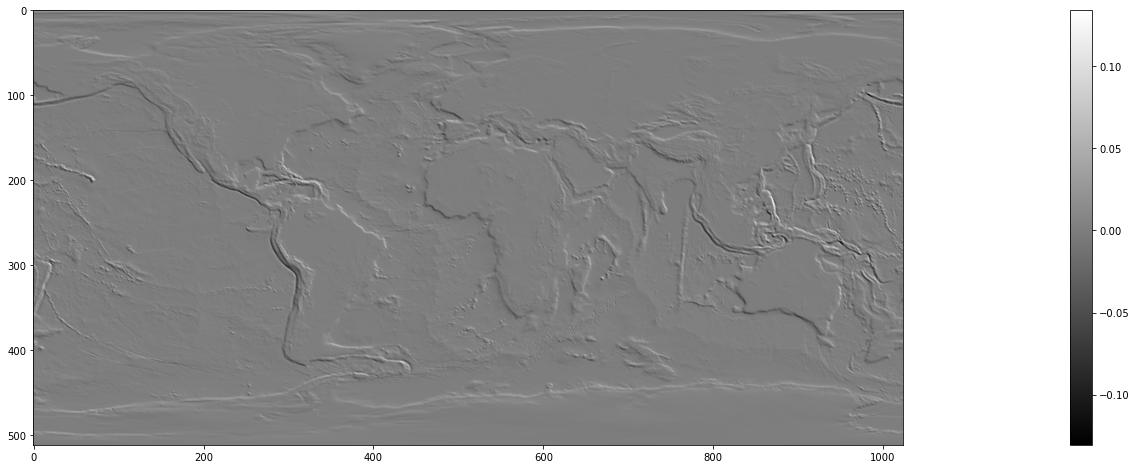

In [10]:
from math import cos, sin, pi
from numpy import loadtxt, empty, sqrt
from pylab import imshow, gray, show, colorbar, figure

phi = 3*pi/4
h = 30000.

w = loadtxt("folha5-data2.txt")

figure(figsize = (60,8))
imshow(w)
gray()
colorbar()
show()

#print(w.shape[0], w.shape[1])

xsize, ysize = w.shape[0], w.shape[1]

print(xsize, ysize)

# calculate derivatives in the center
dx = empty([xsize,ysize], float)
dy = empty([xsize,ysize], float)
dx[1:xsize-1,:] = (w[2:xsize,:] - w[0:xsize-2,:])/(2*h)
dy[:,1:ysize-1] = (w[:,2:ysize] - w[:,0:ysize-2])/(2*h)

# calculate derivatives at the edges
dx[0,:] = (w[1,:] - w[0,:])/h
dx[xsize-1,:] = (w[xsize-1,:] - w[xsize-2,:])/h
dy[:,0] = (w[:,1]- w[:,0])/h
dy[:,ysize-1] = (w[:,ysize-1] - w[:,ysize-2])/h

# calculate the light intensity
I = -(cos(phi)*dx + sin(phi)*dy)/sqrt(dx*dx + dy*dy +1)

figure(figsize = (60,8))
imshow(I)
gray()
colorbar()
show()

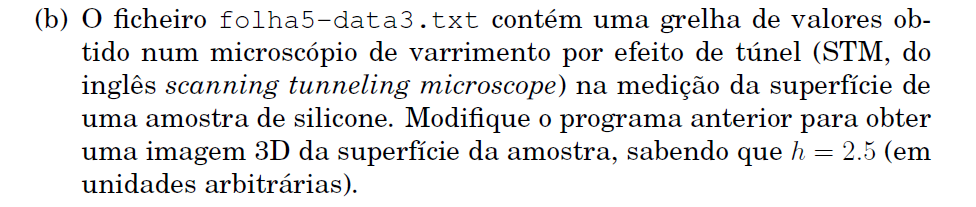

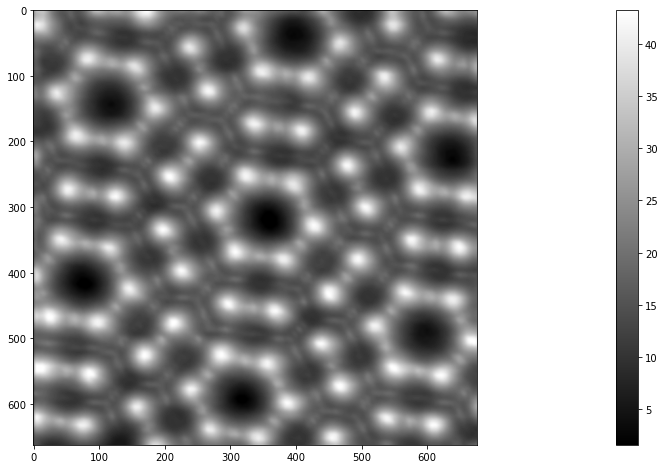

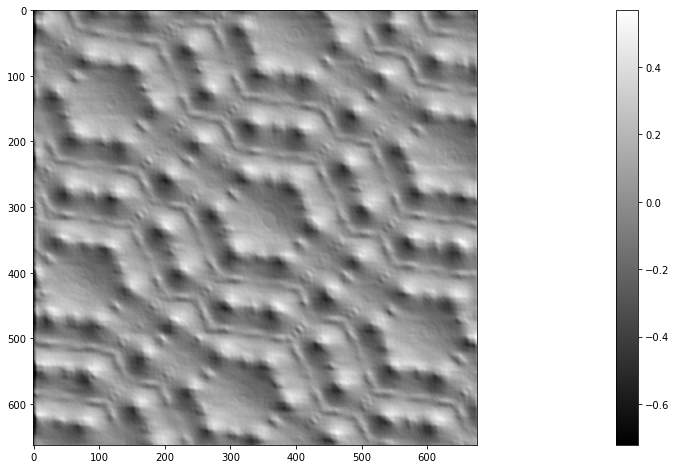

In [14]:
from math import cos, sin, pi
from numpy import loadtxt, empty, sqrt
from pylab import imshow, gray, show, colorbar, figure

phi = 3*pi/4
h = 2.5

w = loadtxt("folha5-data3.txt")

figure(figsize = (50,8))
imshow(w)
gray()
colorbar()
show()

xsize, ysize = w.shape[0], w.shape[1]

#print(xsize, ysize)

# calculate derivatives in the center
dx = empty([xsize,ysize], float)
dy = empty([xsize,ysize], float)
dx[1:xsize-1,:] = (w[2:xsize,:] - w[0:xsize-2,:])/(2*h)
dy[:,1:ysize-1] = (w[:,2:ysize] - w[:,0:ysize-2])/(2*h)

# calculate derivatives at the edges
dx[0,:] = (w[1,:] - w[0,:])/h
dx[xsize-1,:] = (w[xsize-1,:] - w[xsize-2,:])/h
dy[:,0] = (w[:,1]- w[:,0])/h
dy[:,ysize-1] = (w[:,ysize-1] - w[:,ysize-2])/h

# calculate the light intensity
I = -(cos(phi)*dx + sin(phi)*dy)/sqrt(dx*dx + dy*dy +1)

figure(figsize = (50,8))
imshow(I)
gray()
colorbar()
show()

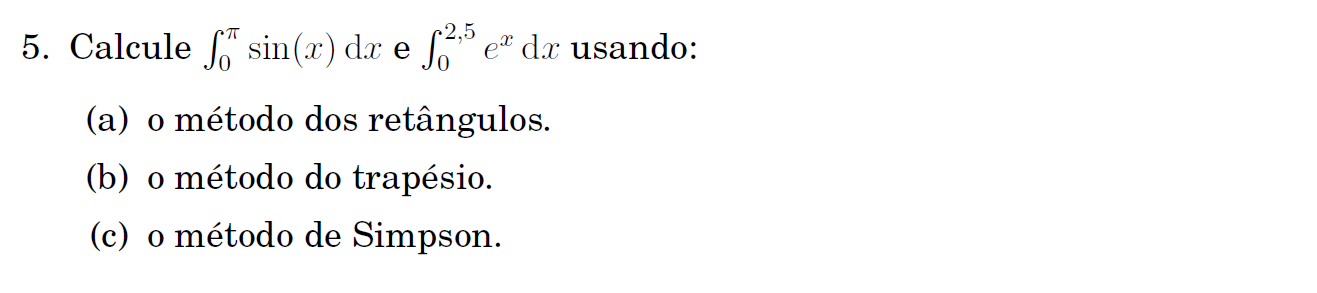

(a) retângulos

2.033281476926104


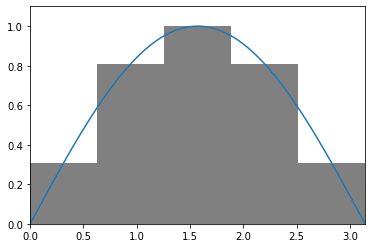

In [44]:
from math import pi,sin
from numpy import linspace
from pylab import plot,show,xlim,ylim,bar

def f(x):
    return sin(x)

def Integrate(x0,xe,n):
    s=0.0
    x=x0
    h=(xe-x0)/n
    for i in range(0,n):
        tmp=f(x+h/2.0)
        s+=tmp
        fbar.append(tmp)
        xi.append(x+h/2.0)
        x+=h
    return(h*s,h)

def Integrate2(x0,xe,n):
    s=0.0
    x=x0
    h=(xe-x0)/n
    for i in range(0,n):
        tmp=f(x0 + i * h)
        s+=tmp
        fbar.append(tmp)
        xi.append(x+h/2.0)
        x+=h
    return(h*s,h)

fbar=[]
xi=[]

N_f=100
px=[]
py=[]
for xx in linspace(0.0,pi,N_f):
    py.append(f(xx))
    px.append(xx)

N_points=5
Int_res,dx=Integrate(0,pi,N_points)
print(Int_res)
plot(px,py)
bar(xi,fbar,dx,facecolor='grey')
ylim(0,1.1)
xlim(0,pi)
show()

11.066853451563258


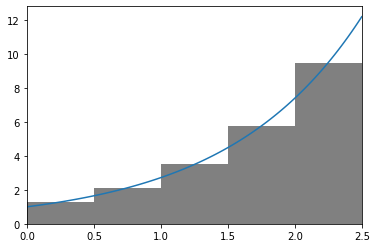

In [20]:
from math import exp
from numpy import linspace
from pylab import plot,show,xlim,ylim,bar

def f(x):
    y=exp(x)
    return y

def Integrate(x0,xe,n):
    s=0.0
    x=x0
    h=(xe-x0)/n
    for i in range(0,n):
        tmp=f(x+h/2.0)
        s+=tmp
        fbar.append(tmp)
        xi.append(x+h/2.0)
        x+=h
    return(h*s,h)

fbar=[]
xi=[]

N_f=100
px=[]
py=[]
for xx in linspace(0.0,2.5,N_f):
    py.append(f(xx))
    px.append(xx)
N_points=5

Int_res,dx=Integrate(0,2.5,N_points)
print(Int_res)
plot(px,py)
bar(xi,fbar,dx,facecolor='grey')
xlim(0,2.5)
show()

(b) trapésio

2.033281476926104


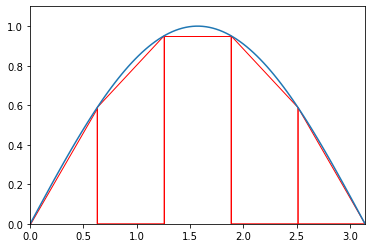

In [30]:
from math import sin,pi
from numpy import linspace,array
from matplotlib import pyplot as plt 
from matplotlib.patches import Polygon

def f(x):
   y=sin(x)
   return y

def Integrate(x0,xe,n):
  s=0.0
  x=x0
  h=(xe-x0)/n
  for i in range(0,n):
    tmp=f(x+h/2.0)
    # #######################
    #  To draw a trapezoid
    # #######################
    points=[[x,0.0],[x+h,0.0],[x+h,f(x+h)],[x,f(x)]]
    ax1.add_patch(Polygon(points,fill=False,edgecolor='r'))
    s+=tmp
    x+=h
  return(h*s,h)

# ######################
# To draw a trapezoid
# ######################
fig=plt.figure()
ax1=fig.add_subplot(111)
# ######################

N_f=100
px=[]
py=[]
for xx in linspace(0.0,pi,N_f):
  py.append(f(xx))
  px.append(xx)
N_points=5
Int_res,dx=Integrate(0,pi,N_points)
print(Int_res)
plt.plot(px,py)
plt.ylim(0.0,1.1)
plt.xlim(0,pi)
plt.show()

11.066853451563258


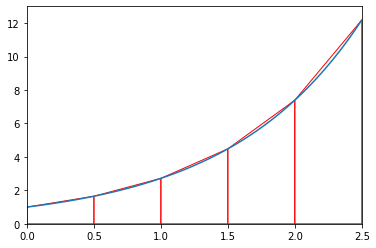

In [27]:
from math import exp
from numpy import linspace,array
from matplotlib import pyplot as plt 
from matplotlib.patches import Polygon

def f(x):
   y=exp(x)
   return y

def Integrate(x0,xe,n):
  s=0.0
  x=x0
  h=(xe-x0)/n
  for i in range(0,n):
    tmp=f(x+h/2.0)
    # #######################
    #  To draw a trapezoid
    # #######################
    points=[[x,0.0],[x+h,0.0],[x+h,f(x+h)],[x,f(x)]]
    ax1.add_patch(Polygon(points,fill=False,edgecolor='r'))
    s+=tmp
    x+=h
  return(h*s,h)

# ######################
# To draw a trapezoid
# ######################
fig=plt.figure()
ax1=fig.add_subplot(111)
# ######################

N_f=100
px=[]
py=[]
for xx in linspace(0.0,2.5,N_f):
  py.append(f(xx))
  px.append(xx)
    
N_points=5
Int_res,dx=Integrate(0,2.5,N_points)
print(Int_res)
plt.plot(px,py)
plt.ylim(0,13)
plt.xlim(0,2.5)
plt.show()

(c) Simpson

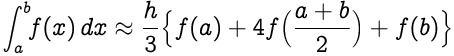

In [48]:
from math import sin,pi
from numpy import linspace

def f(x):
    y=sin(x)
    return y

def simpson(xmin,xmax,num_int):
    x=linspace(xmin,xmax,num_int)
    h=x[1]-x[0]
    i=0
    integral=0.0
    i_max=x.size-2
    while i<i_max:
        integral+=(f(x[i])+4.0*f(x[i+1])+f(x[i+2]))
        i+=2
    return (integral*h/3.0)

integ=simpson(0.0,pi,5)
print("Result=",integ)

Result= 2.0045597549844207


In [29]:
from math import exp
from numpy import linspace

def f(x):
    y=exp(x)
    return y

def simpson(x0,xe,num_int):
    x=linspace(x0,xe,num_int)
    h=x[1]-x[0]
    i=0
    integral=0.0
    i_max=x.size-2
    while i<i_max:
        integral+=(f(x[i])+4.0*f(x[i+1])+f(x[i+2]))
        i+=2
    return (integral*h/3.0)

integ=simpson(0.0,2.5,5)
print("Result=",integ)

Result= 11.191550038890936


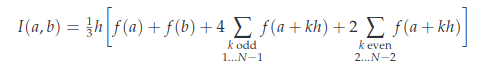

In [49]:
from math import sin,pi

def f(x):
    return sin(x)

N = 100
a = 0.0
b = pi
h = (b-a)/N

s1 = 0.0

for k in range(1,N,2):
    s1 += f(a+k*h)
    
s2 = 0.0
for k in range(2,N,2):
    s2 += f(a+k*h)

I = (f(a) + f(b) + 4*s1 + 2*s2)*h/3
print(I)

2.000000010824504


In [31]:
from math import exp

def f(x):
    return exp(x)

N = 100
a = 0.0
b = 2.5
h = (b-a)/N

s1 = 0.0

for k in range(1,N,2):
    s1 += f(a+k*h)
    
s2 = 0.0
for k in range(2,N,2):
    s2 += f(a+k*h)

I = (f(a) + f(b) + 4*s1 + 2*s2)*h/3
print(I)

11.182493984969234


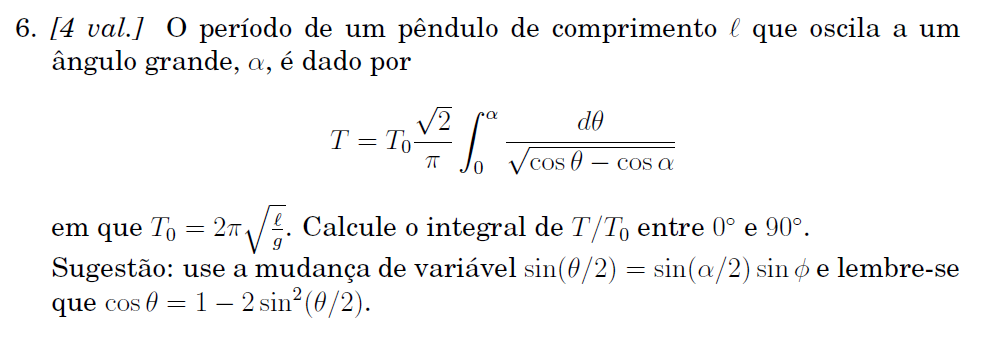

In [53]:
import scipy
from scipy.integrate import quad
from math import *
 
def f(x,a):
    angle = pi * a / 180
    return (sqrt(2)/pi)/sqrt(cos(x)-cos(a))
 
#it is not possible to compute:
print(quad(f,0,pi,args=pi/2))

ZeroDivisionError: float division by zero

Não funciona porque há uma divergência para $\theta = 90^\circ$


- Com a mudança de variável ficamos com a expressão: $T =  \frac{2 T_0}{\pi} \int_0^{\alpha/2} \frac{d\phi}{\sqrt{1-\sin^2(\alpha/2)\sin^2(\phi)}} $, que já pode ser integrada.

for 90 degrees: (1.180340599016096, 2.2814624786294614e-12)


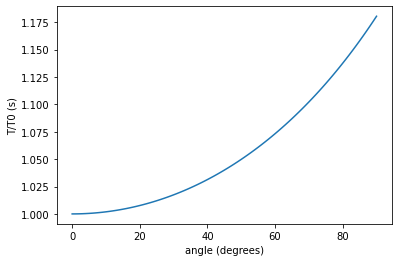

In [54]:
from math import sin, pi, sqrt
import scipy
from scipy.integrate import quad
from matplotlib import pyplot as plt 
 
#the function to be integrated:
def f(x, a):
    return(2/pi)/sqrt(1-sin(a/2)**2*sin(x)**2)

xx = []
yy = []

for i in range(0, 91):
    angle = pi * i / 180
    xx.append(float(i))
    yy.append(quad(f,0,pi/2,args=(angle))[0])
    if(i==90): print("for 90 degrees:",quad(f,0,pi/2,args=(angle)))
    
plt.plot(xx,yy)
plt.xlabel("angle (degrees)")
plt.ylabel("T/T0 (s)")
plt.show()